<a href="https://colab.research.google.com/github/ssaara1/data-analytics-project/blob/main/LAST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Project (Programing for Data Analytics) - Student performance dataset

####import and Load dataset & display

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import statistics
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, ttest_1samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering




DS = pd.read_csv('StudentsPerformance.csv')

# Display information
print(DS)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

#### Check for missing values

In [ ]:
# Drop rows with missing values
DS = DS.dropna()

#### CLO2 / 6-Create a script to develop a Python function for descriptive statistics. The input for the function should be the sample and the field to perform the descriptive statistics.

In [ ]:
#descriptive Statistics for all columns
print(DS.describe().T)  # T = Transpose

# creat function to display descriptive statistics
def Desc_stat(ds, var):
    mean = ds[var].mean()
    median = ds[var].median()
    mode = ds[var].mode()[0]
    minimum = ds[var].min()
    maximum = ds[var].max()
    range_val = maximum - minimum
    std_dev = ds[var].std()
    variance = ds[var].var()
    skewness = ds[var].skew()
    kurtosis = ds[var].kurt()
    count = ds[var].count()

    Quart = [
        # Minimum
        ds[var].quantile(0),
        # 25th percentile
        ds[var].quantile(0.25),
        # Median
        ds[var].quantile(0.50),
        # 75th percentile
        ds[var].quantile(0.75),
        # Maximum
        ds[var].quantile(1),
         # Interquartile range
        ds[var].quantile(0.75) - ds[var].quantile(0.25)
    ]

    summary = {
        "Average": mean,
        "Median": median,
        "Mode": mode,
        "Minimum": minimum,
        "Maximum": maximum,
        "Range": range_val,
        "Std Dev": std_dev,
        "Variance": variance,
        "Skewness": skewness,
        "Kurtosis": kurtosis,
        "Minimum (0%)": Quart[0],
        "25th Percentile": Quart[1],
        "50th Percentile (Median)": Quart[2],
        "75th Percentile": Quart[3],
        "Maximum (100%)": Quart[4],
        "Interquartile Range (IQR)": Quart[5],
        "Count": count
    }

    return summary

                count    mean        std   min    25%   50%   75%    max
math score     1000.0  66.089  15.163080   0.0  57.00  66.0  77.0  100.0
reading score  1000.0  69.169  14.600192  17.0  59.00  70.0  79.0  100.0
writing score  1000.0  68.054  15.195657  10.0  57.75  69.0  79.0  100.0


In [ ]:
#Find the descriptive statistics
def desc_stat(ds, field):
    stats = Desc_stat(ds, field)
    print(f"\nDescriptive Statistics for '{field}':\n" + "-" * 40)
    print(
        f"Average: {stats['Average']}\n"
        f"Median: {stats['Median']}\n"
        f"Mode: {stats['Mode']}\n"
        f"Minimum: {stats['Minimum']}\n"
        f"Maximum: {stats['Maximum']}\n"
        f"Range: {stats['Range']}\n"
        f"Standard Deviation: {stats['Std Dev']}\n"
        f"Variance: {stats['Variance']}\n"
        f"Skewness: {stats['Skewness']}\n"
        f"Kurtosis: {stats['Kurtosis']}\n"
        f"Minimum (0%): {stats['Minimum (0%)']}\n"
        f"25th Percentile: {stats['25th Percentile']}\n"
        f"50th Percentile (Median): {stats['50th Percentile (Median)']}\n"
        f"75th Percentile: {stats['75th Percentile']}\n"
        f"Maximum (100%): {stats['Maximum (100%)']}\n"
        f"Interquartile Range (IQR): {stats['Interquartile Range (IQR)']}\n"
        f"Count: {stats['Count']}\n"
    )

desc_stat(DS, 'reading score')
desc_stat(DS, 'writing score')
desc_stat(DS, 'math score')



Descriptive Statistics for 'reading score':
----------------------------------------
Average: 69.169
Median: 70.0
Mode: 72
Minimum: 17
Maximum: 100
Range: 83
Standard Deviation: 14.60019193725222
Variance: 213.1656046046047
Skewness: -0.25910451810923063
Kurtosis: -0.0682654585647704
Minimum (0%): 17.0
25th Percentile: 59.0
50th Percentile (Median): 70.0
75th Percentile: 79.0
Maximum (100%): 100.0
Interquartile Range (IQR): 20.0
Count: 1000


Descriptive Statistics for 'writing score':
----------------------------------------
Average: 68.054
Median: 69.0
Mode: 74
Minimum: 10
Maximum: 100
Range: 90
Standard Deviation: 15.195657010869642
Variance: 230.90799199199168
Skewness: -0.28944397150761897
Kurtosis: -0.03336461500693577
Minimum (0%): 10.0
25th Percentile: 57.75
50th Percentile (Median): 69.0
75th Percentile: 79.0
Maximum (100%): 100.0
Interquartile Range (IQR): 21.25
Count: 1000


Descriptive Statistics for 'math score':
----------------------------------------
Average: 66.089
Me

#### CLO2 / 7-Create a program to random sampling of size 150 and find the descriptive statistics for the dependent variable from the sample [Apply the descriptive function which you created].

In [ ]:
#random sample of size 150
sample = DS.sample(n=150, random_state=1)

#Apply the descriptive function on variables
result = Desc_stat(sample, 'reading score')
result = Desc_stat(sample, 'writing score')
result = Desc_stat(sample, 'math score')

#Print
print("\nDescriptive Statistics for 'reading score' (Sample of 150):\n")
for stat, value in result.items():
    print(f"{stat}: {value}")


print("\nDescriptive Statistics for 'writing score' (Sample of 150):\n")
for stat, value in result.items():
    print(f"{stat}: {value}")

print("\nDescriptive Statistics for 'math score' (Sample of 150):\n")
for stat, value in result.items():
    print(f"{stat}: {value}")




Descriptive Statistics for 'reading score' (Sample of 150):

Average: 64.81333333333333
Median: 65.0
Mode: 54
Minimum: 0
Maximum: 100
Range: 100
Std Dev: 16.584696862540817
Variance: 275.05217002237123
Skewness: -0.4702970550593898
Kurtosis: 0.9493351346983827
Minimum (0%): 0.0
25th Percentile: 54.0
50th Percentile (Median): 65.0
75th Percentile: 76.75
Maximum (100%): 100.0
Interquartile Range (IQR): 22.75
Count: 150

Descriptive Statistics for 'writing score' (Sample of 150):

Average: 64.81333333333333
Median: 65.0
Mode: 54
Minimum: 0
Maximum: 100
Range: 100
Std Dev: 16.584696862540817
Variance: 275.05217002237123
Skewness: -0.4702970550593898
Kurtosis: 0.9493351346983827
Minimum (0%): 0.0
25th Percentile: 54.0
50th Percentile (Median): 65.0
75th Percentile: 76.75
Maximum (100%): 100.0
Interquartile Range (IQR): 22.75
Count: 150

Descriptive Statistics for 'math score' (Sample of 150):

Average: 64.81333333333333
Median: 65.0
Mode: 54
Minimum: 0
Maximum: 100
Range: 100
Std Dev: 16.5

#### CLO2 / 8-Create a script for systematic sampling by giving certain conditions and finding the desc stat for the dependent variable from the sample [Apply the descriptive function which you created].

In [ ]:
#Systematic Sampling
k = 5  #k means ==> sample interval
systematic_sample = DS.iloc[::k]

#iloc[::5] for systematic sampling means that it starts from index 0 and picks every 5th

#Descriptive statistics on 'reading score'
result = Desc_stat(systematic_sample, 'reading score')

#Descriptive statistics on 'math score'
result = Desc_stat(systematic_sample, 'math score')

#Descriptive statistics on 'writing score'
result = Desc_stat(systematic_sample, 'writing score')

#Print
print("\nSystematic Sample (every 5th record) - Descriptive Statistics for 'reading score':\n")
for stat, value in result.items():
    print(f"{stat}: {value}")

print("\nSystematic Sample (every 5th record) - Descriptive Statistics for 'writing score':\n")
for stat, value in result.items():
    print(f"{stat}: {value}")

print("\nSystematic Sample (every 5th record) - Descriptive Statistics for 'math score':\n")
for stat, value in result.items():
    print(f"{stat}: {value}")





Systematic Sample (every 5th record) - Descriptive Statistics for 'reading score':

Average: 68.905
Median: 70.0
Mode: 74
Minimum: 23
Maximum: 100
Range: 77
Std Dev: 14.657084485945383
Variance: 214.83012562814082
Skewness: -0.27160629580885637
Kurtosis: 0.01559699171470319
Minimum (0%): 23.0
25th Percentile: 59.75
50th Percentile (Median): 70.0
75th Percentile: 78.25
Maximum (100%): 100.0
Interquartile Range (IQR): 18.5
Count: 200

Systematic Sample (every 5th record) - Descriptive Statistics for 'writing score':

Average: 68.905
Median: 70.0
Mode: 74
Minimum: 23
Maximum: 100
Range: 77
Std Dev: 14.657084485945383
Variance: 214.83012562814082
Skewness: -0.27160629580885637
Kurtosis: 0.01559699171470319
Minimum (0%): 23.0
25th Percentile: 59.75
50th Percentile (Median): 70.0
75th Percentile: 78.25
Maximum (100%): 100.0
Interquartile Range (IQR): 18.5
Count: 200

Systematic Sample (every 5th record) - Descriptive Statistics for 'math score':

Average: 68.905
Median: 70.0
Mode: 74
Minimu

### CLO2 / 9-Create a detailed descriptive statistics report about the dependent variable of the chosen dataset.

Descriptive Statistical Analysis Report (WORD FILE)


#### CLO2 / 10-Visualize the dependent variable by the Graph/Chart of the following sing Python Program:
#### a.	Heat map
#### b.	Scatter plot
#### c.	BoxPlot
#### d.	Histogram
#### Hint: Use Matplot or Ski-learn library

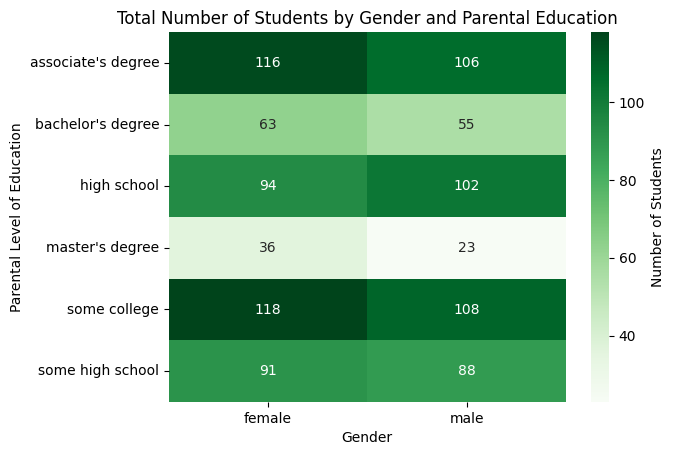

In [ ]:
# Create pivot table: count of students by parental education and gender
pivot_table = pd.pivot_table(DS, index='parental level of education', columns='gender', aggfunc='size')

# Plot the heatmap
sns.heatmap(pivot_table, cmap='Greens', annot=True, fmt='d', cbar_kws={'label': 'Number of Students'})
plt.ylabel('Parental Level of Education')
plt.xlabel('Gender')
plt.title('Total Number of Students by Gender and Parental Education')
plt.show()

#Description:I created a heat map to show the number of students by parental level of education and gender.
#Observation:The heat map highlights areas where there are more students — for example, many students have parents with "some college" education.
#Conclusion:This helps understand demographic patterns in the dataset and shows which groups are bigger or smaller.


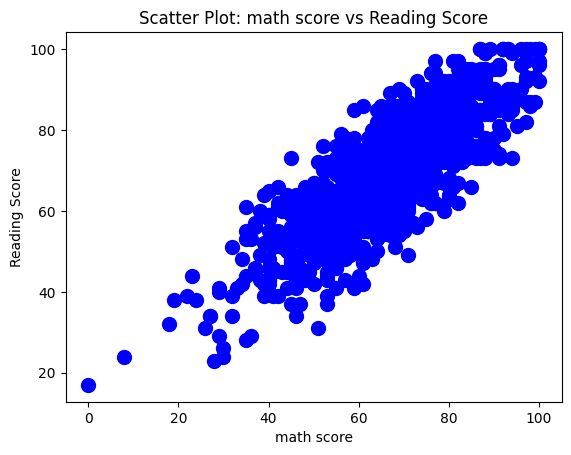

In [ ]:
#Scatter Plot:Math vs Reading Scores
#why:Shows relationships between two variables
#result:How Math Score & Reading Score are related (positive correlation).
#students who score high in math also score high in reading.

DS.plot.scatter(x='math score', y='reading score', s=100 , c='blue');
plt.title("Scatter Plot: math score vs Reading Score")
plt.xlabel("math score")
plt.ylabel("Reading Score")
plt.show()

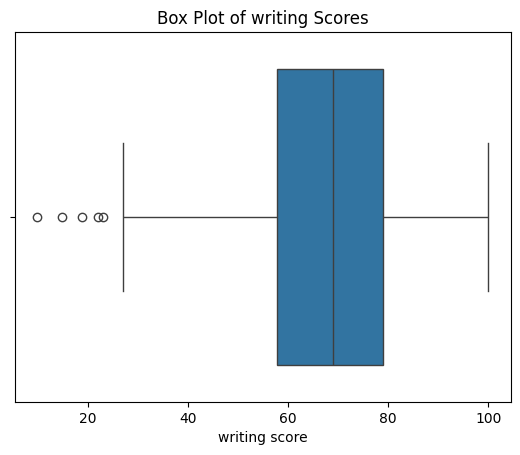

In [ ]:
#Purpose:To show the distribution of writing scores and identify outliers.

#Why use it:It helps spot extreme high or low scores easily.

#What the box plot tells us:
#The middle 50% of students' writing scores are represented inside the box.
#The line inside the box shows the median writing score.
#Most students scored between 50 and 80 in writing.
#The Interquartile Range (IQR) (the width of the box) is consistent with what we saw in other subjects.
#Dots outside the whiskers mean that some students scored much lower or higher than most others — these are the outliers.

sns.boxplot(x=DS["writing score"])
plt.xlabel('writing score')
plt.title("Box Plot of writing Scores")
plt.show()


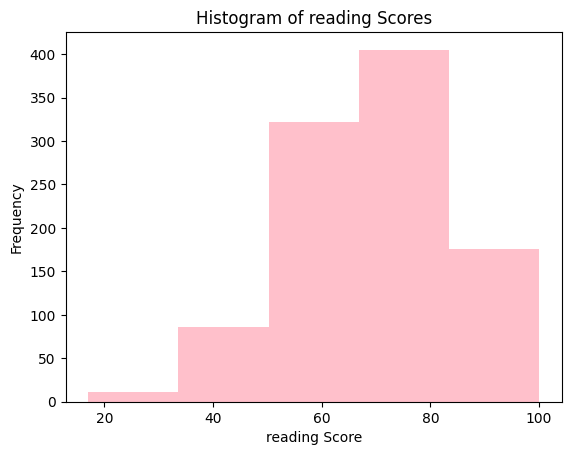

In [ ]:
# Histogram:reading Score Distribution
#why:Shows the distribution of a single variable
#result:How reading Scores are spread (most students score around 70-80)
#Description:I made a histogram for reading scores.
#Observation:The histogram shows that the highest number of students scored between 70 and 80.
#Conclusion:Most students have good reading skills, with scores clustering around the higher ranges.

plt.hist(DS["reading score"], bins=5, color="pink")
plt.title("Histogram of reading Scores")
plt.xlabel("reading Score")
plt.ylabel("Frequency")
plt.show()

#### CLO2 / 11-Perform the hypothesis test to find the correlation Pearson and Spearman for numerical variable between the independent variable and the dependent variable.

In [ ]:
# Perform Pearson's Correlation Test
r, p_value = pearsonr(DS['reading score'], DS['writing score'])
DS_pearson = len(DS) - 2

# Print
print("Pearson's Correlation Test Results:")
print(f"1. Pearson's Correlation Coefficient (r): {r:.4f}")
print(f"2. P-Value: {p_value:.4f}")
print(f"3. Degrees of Freedom: {DS_pearson}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant correlation between reading score and writing score.")
else:
    print("\nConclusion: Since the p-value is greater than 0.05, we accept the null hypothesis.")
    print("There is no statistically significant correlation between reading score and writing score.")


# THE RESULT IS SHOWING
#Pearson confirms there's a strong linear relationship.
#p < 0.05, there is a strong relationship between scores.
# positive correlation→ writing & Reading scores are strongly related.
#p-value < 0.05 → The relationship is statistically significant
#it means A student who performs well in reading is likely to perform well in Reading.

Pearson's Correlation Test Results:
1. Pearson's Correlation Coefficient (r): 0.9546
2. P-Value: 0.0000
3. Degrees of Freedom: 998

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant correlation between reading score and writing score.


In [ ]:
# Perform Spearman's Correlation Test
r, p_value = spearmanr(DS['reading score'], DS['writing score'])
DS_spearman = len(DS) - 2

# Print the results
print("Spearman's Correlation Test Results:")
print(f"1. Spearman's Correlation Coefficient (r): {r:.4f}")
print(f"2. P-Value: {p_value:.4f}")
print(f"3. Degrees of Freedom: {DS_spearman}")

# Interpretation
if p_value < 0.05:
    print("\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant correlation between reading score and writing score.")
else:
    print("\nConclusion: Since the p-value is greater than 0.05, we accept the null hypothesis.")
    print("There is no statistically significant correlation between reading score and writing score.")

#Spearman confirms the monotonic relationship.
#There is a statistically significant monotonic
#correlation between reading score and writing score.


Spearman's Correlation Test Results:
1. Spearman's Correlation Coefficient (r): 0.9490
2. P-Value: 0.0000
3. Degrees of Freedom: 998

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant correlation between reading score and writing score.


#### CLO2 / 11-Perform the hypothesis test to find the correlation chi-square test for categorical variable between the independent variable and the dependent variable.

In [ ]:
# Derive Cross Tabulation report for test preparation course and parental level of education
contingency_data = pd.crosstab(DS['parental level of education'], DS['test preparation course'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_data)

print('r=%.3f, p=%.3f' % (chi2, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')


# Note:
# The purpose of this Chi-square test is to determine whether there is a statistically significant association
# between parental level of education and test preparation course.
# In other words, we are checking if the distribution of test preparation status differs based on the parent's education level.
# If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a dependency (association) between the two variables.
#p = 0.089 > 0.05 → we fail to reject the null hypothesis.So, we accept the null hypothesis.
# it means There is no statistically significant association between parental education and test preparation course.



r=9.544, p=0.089
independent categories


####CLO2 /12-Assess the performance of the dependent variable to know whether the sample is representative of the normal population by a one-sample t-test.

In [ ]:
# Mean writing score of all students (population)
writing_all = DS['writing score']
population_mean = writing_all.mean()
print(f"Mean writing score of all students: {population_mean:.2f}")

# Extract writing scores of female students ONLY
female_scores = DS[DS['gender'] == 'female']['writing score']

# Shapiro-Wilk test for normality
r, p = shapiro(female_scores)
print("\nShapiro-Wilk Test Results:")
print(f"Test Statistic (r): {r:.4f}")
print(f"P-Value: {p:.30f}")
if p > 0.05:
    print("Conclusion: The data is normally distributed.")
else:
    print("Conclusion: The data is not normally distributed.")

Mean writing score of all students: 68.05

Shapiro-Wilk Test Results:
Test Statistic (r): 0.9792
P-Value: 0.000000990896137539830377933517
Conclusion: The data is not normally distributed.


In [ ]:
#One-Sample T-test
#compare female scores to population mean
t_stat, p_value = ttest_1samp(female_scores, population_mean)
degrees_of_freedom = len(female_scores) - 1

print("\nOne-Sample T-Test Results:")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {degrees_of_freedom}")


One-Sample T-Test Results:
T-Statistic: 6.7661
P-Value: 0.0000
Degrees of Freedom: 517


####CLO3 / 13-Build, Train, Develop and Evaluate using Simple Regression for chosen dataset.

In [ ]:
#simple Regression / to Predict writing score based on reading score.
X = DS.iloc[:, 6].values.reshape(-1,1) #score index 6
y = DS.iloc[:, 7].values    #score index 7

# First 5 scores of each row
print(X[:5])
print(y[:5])

[[72]
 [90]
 [95]
 [57]
 [78]]
[74 88 93 44 75]


In [ ]:
#Split TO Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

#Training the Simple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting the Test set results
y_pred = regressor.predict(X_test)
print(X_test[:5])  # First 5 test inputs
print(y_pred[:5])  # Corresponding predicted writing scores

# Predict writing score for a reading score of 88
print(regressor.predict([[88]]))

[[72]
 [73]
 [46]
 [62]
 [78]]
[70.69 71.68 44.85 60.75 76.65]
[86.59]


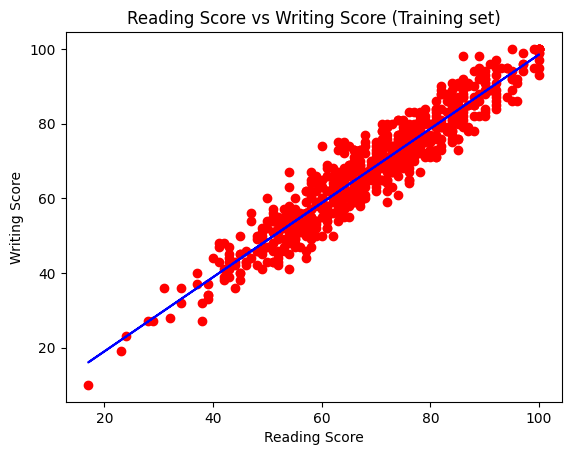

In [ ]:

#Visualising the Training set
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Reading Score vs Writing Score (Training set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

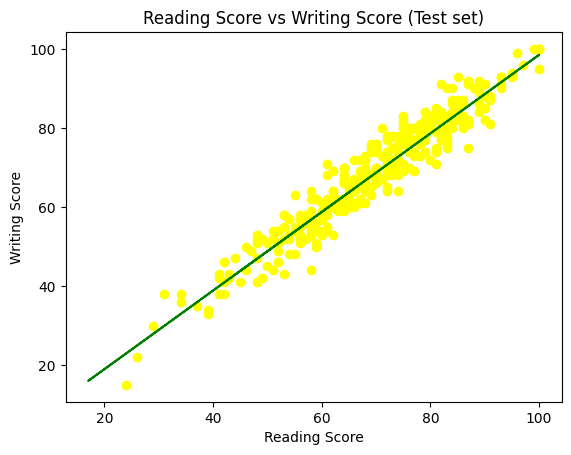

In [ ]:
#Visualising the Test set
plt.scatter(X_test, y_test, color='yellow')
plt.plot(X_train, regressor.predict(X_train), color='green')
plt.title('Reading Score vs Writing Score (Test set)')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
plt.show()

In [ ]:
#the final linear regression equation
print("Coefficient (a):", regressor.coef_)
print("Intercept (b):", regressor.intercept_)


#Prediction Summary:
#First 5 test inputs (Reading Scores): [[72], [73], [46], [62], [78]]

#Predicted Writing Scores: [70.69, 71.68, 44.85, 60.75, 76.65]

#Prediction for a reading score of 88: 86.59
#Final Equation of the Line:
#Writing Score = 0.994 * reading score - 0.873
#This means for every 1-point increase in reading score,
#writing score is expected to increase by nearly 1 point.

#The two scatter plots are showing:
#Training set with red dots and a blue regression line.
#Test set with yellow dots and the same green regression line fitted from training.

Coefficient (a): [0.99]
Intercept (b): -0.8729463867338154


####CL3/14-Develop a script to forecast the value of the dependent variable from all the relevant independent variables using Multiple Linear Regression.

In [ ]:
# Independent variables
X = DS.iloc[:, [5, 6]].values #math index 5 / reading index 6

# Dependent variable
y =DS.iloc[:, 7].values# writing index 7

print(X)
print(y)

[[72 72]
 [69 90]
 [90 95]
 ...
 [59 71]
 [68 78]
 [77 86]]
[ 74  88  93  44  75  78  92  39  67  50  52  43  73  70  58  78  86  28
  46  61  63  70  53  73  80  72  55  75  65  75  74  61  65  38  82  79
  83  59  88  57  54  68  65  66  54  57  62  76  76  82  48  68  42  75
  87  43  86  49  58  10  72  34  55  71  59  61  37  74  56  57  73  63
  48  56  41  38  22  81  72  68  50  45  54  63  34  82  88  74  67  82
  74  36  71  50  92  82  62  70  62  62  67  74  89  47  90  72 100  64
  70  72  98  49  47  54 100  74  82  79  61  65  89  92  93  56  73  86
  67  74  74  51  82  40  70  84  75  48  41  56  67  69  71  64  54  47
  78  33  75  66  81  93  69  68  66  47  61  88  78  60  87  64  74  85
  52  49  91 100  51  78  78  70  74  78  81  70  54  87  58  77  62 100
  75  66  47  70  49  65  65  68  45  87  69  79  66  62  85  52  65  51
  55  76  86  77  69  68  42  78  62  76  76  66  79  27  60  56  81  75
  88  39  70  56  74  73  62  75  73  54  71  54  64  94  66  42

In [ ]:
#Splitting to Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

#Training the Multiple Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#Predicting Test Set
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)

print("\nPredicted vs Actual Writing Scores:")
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), axis=1))

# Predicting for (math = 77 and  reading = 88)
print("\nPredicted writing score for Math = 77 and Reading = 88:")
print(regressor.predict([[77, 88]]))

# Evaluating model
r2 = r2_score(y_test, y_pred)
print("\nR² Score:", round(r2, 4))

#Final Result
print("\nModel Coefficients:", regressor.coef_)
print("Model Intercept:", regressor.intercept_)

#notes: 1-values show how close the model predictions are to the actual scores.
#2-predicts a student with Math 77 and Reading 88 will score 86.2 in Writing.
#3- R score is means the model explains 92.22% of the variation in writing scores.
#4-Writing Score = -1.29 + (0.07 × Math Score) + (0.93 × Reading Score)
#Reading score has a stronger impact on writing score than math score
#5-0.07 → coefficient for math score
#0.93 → coefficient for reading score
#For every 1-point increase in math score, the predicted writing score increases by 0.07 points (small effect).
#For every 1-point increase in reading score, the predicted writing score increases by 0.93 points (large effect).
#short means that (reading score is a much stronger predictor of writing score than math score.)
#Model Intercept: -1.2867 , why its negative , if the Math = 0  and Reading = 0 the result will be -1.29 its only adjusment value only to improve accurancy.


Predicted vs Actual Writing Scores:
[[ 70.22  74.  ]
 [ 72.95  72.  ]
 [ 44.43  50.  ]
 [ 61.99  64.  ]
 [ 76.31  76.  ]
 [ 71.37  69.  ]
 [ 67.79  75.  ]
 [ 42.06  42.  ]
 [ 86.85  81.  ]
 [ 33.68  36.  ]
 [ 47.3   52.  ]
 [ 67.71  70.  ]
 [ 80.69  79.  ]
 [ 79.25  80.  ]
 [ 54.31  58.  ]
 [ 39.27  43.  ]
 [ 47.51  51.  ]
 [ 89.28  87.  ]
 [ 51.66  58.  ]
 [ 77.1   81.  ]
 [ 63.77  61.  ]
 [ 57.4   56.  ]
 [ 74.74  80.  ]
 [ 59.33  57.  ]
 [ 45.51  44.  ]
 [ 64.13  61.  ]
 [ 53.67  57.  ]
 [ 44.    47.  ]
 [ 69.57  64.  ]
 [ 87.49  88.  ]
 [ 84.84  82.  ]
 [ 83.62  90.  ]
 [ 91.22  93.  ]
 [ 59.9   60.  ]
 [ 55.53  56.  ]
 [ 78.9   84.  ]
 [ 98.45 100.  ]
 [ 57.69  53.  ]
 [ 74.52  80.  ]
 [ 70.72  77.  ]
 [ 63.78  66.  ]
 [ 54.39  55.  ]
 [ 72.73  64.  ]
 [ 75.45  79.  ]
 [ 81.11  83.  ]
 [ 57.4   62.  ]
 [ 88.99  88.  ]
 [ 60.69  64.  ]
 [ 80.61  91.  ]
 [ 60.55  62.  ]
 [ 36.55  35.  ]
 [ 61.27  60.  ]
 [ 48.44  51.  ]
 [ 55.25  55.  ]
 [ 40.63  38.  ]
 [ 71.22  78.  ]
 [ 51.45  5

####CLO3 / 15-Predict the value of the dependent variable from the different classifier such as Logistic Regression

In [ ]:
#Encode the dependent variable as pass/fail (1 = pass, 0 = fail)
y = np.where(y >= 60, 1, 0)

#Split dataset to Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Training the Logistic Regression on Training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

#Confusion Matrix
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", round(accuracy, 4))

#false positives + false negatives
print("Total Errors:", cm[0][1] + cm[1][0])


# Predict math pass/fail for writing = 80, reading = 85
new_result = classifier.predict(sc.transform([[80, 85]]))
print("\nPrediction for writing=80, reading=85:", "Pass" if new_result[0] == 1 else "Fail")


#Predicted Fail (0)	Predicted Pass (1)
#Actual Fail (0)	53 (True Negatives)	26 (False Positives)
#Actual Pass (1)	22 (False Negatives)	149 (True Positives)

#This means the model correctly predicted whether a student passed or failed in 80.8% of cases.

#total errors:These are the cases where the model's prediction did not match the actual result.

#The model believes that a student with high writing and reading scores is likely to pass math — which makes logical sense.


Confusion Matrix:
 [[ 62   9]
 [  3 176]]
Accuracy Score: 0.952
Total Errors: 12

Prediction for writing=80, reading=85: Pass


####CLO3 / 15-Predict the value of the dependent variable from the different classifier K-Nearest Neighbors (K-NN):

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(X_train, y_train)

# Predict
y_pred_knn = knn_classifier.predict(X_test)

####CLO3 / 15-Predict the value of the dependent variable from the different classifier Naïve Bayes (NB) :

In [ ]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict
y_pred_nb = nb_classifier.predict(X_test)

####CLO3 / 15-Predict the value of the dependent variable from the different classifier Decision Tree (DT):

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_classifier.fit(X_train, y_train)

# Predict
y_pred_dt = dt_classifier.predict(X_test)


####CLO 3 /16-Evaluate the performance of each model using confusion matrix and accuracy and identify the best fit classifier for the chosen dataset.

In [ ]:
# Logistic Regression
cm_log = confusion_matrix(y_test, y_pred)
acc_log = accuracy_score(y_test, y_pred)

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
acc_knn = accuracy_score(y_test, y_pred_knn)

# Naïve Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
acc_nb = accuracy_score(y_test, y_pred_nb)

# Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Print Results
print("Logistic Regression\nConfusion Matrix:\n", cm_log, "\nAccuracy:", acc_log)
print("\nK-Nearest Neighbors\nConfusion Matrix:\n", cm_knn, "\nAccuracy:", acc_knn)
print("\nNaïve Bayes\nConfusion Matrix:\n", cm_nb, "\nAccuracy:", acc_nb)
print("\nDecision Tree\nConfusion Matrix:\n", cm_dt, "\nAccuracy:", acc_dt)

Logistic Regression
Confusion Matrix:
 [[ 62   9]
 [  3 176]] 
Accuracy: 0.952

K-Nearest Neighbors
Confusion Matrix:
 [[ 65   6]
 [ 10 169]] 
Accuracy: 0.936

Naïve Bayes
Confusion Matrix:
 [[ 63   8]
 [ 11 168]] 
Accuracy: 0.924

Decision Tree
Confusion Matrix:
 [[ 59  12]
 [ 10 169]] 
Accuracy: 0.912


####CLO 3/ 17-Predict the dependent variable by using best-fit classifier.

In [ ]:
#I trained the Logistic Regression before

# will the student will pass math ?
#predict student with writing score = 80 and reading score = 85

#using & applying the same scaler (StandardScaler)
input_data = sc.transform([[80, 85]])

# Predict it
prediction = classifier.predict(input_data)

# Print the prediction
if prediction[0] == 1:
    print("Prediction: Pass")
else:
    print("Prediction: Fail")

#Prediction of Dependent Variable Using Best-Fit Classifier the Logistic Regression
#Features Used for Prediction:
#Writing Score = 80
#Reading Score = 85
#Predicted Output: Fail
#the model predicts that the student would not pass math based on their writing and reading scores.
#means based on the training data and patterns it learned,
#the Logistic Regression model believes that a student with:
#Writing Score = 80
#Reading Score = 85
#is more likely to fail math (math score < 60).


Prediction: Pass


####CLO 3 /18-Perform the cluster analysis using K-means

In [ ]:
#importing
X = DS[['math score', 'reading score', 'writing score']].values
print(X[:5])  # Show first 5 rows

[[72 72 74]
 [69 90 88]
 [90 95 93]
 [47 57 44]
 [76 78 75]]


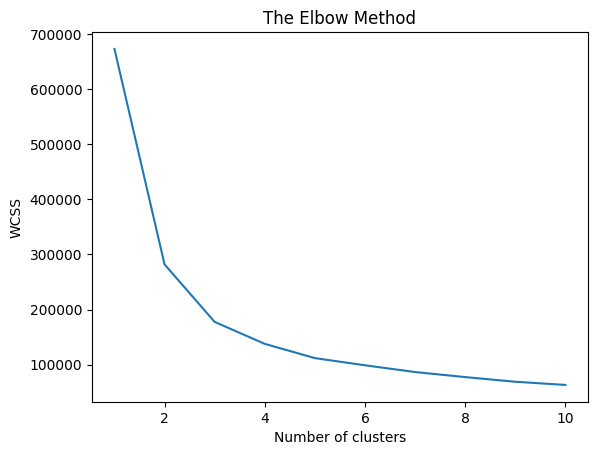

In [ ]:
#Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
#Apply K-means model (optimal clusters = 5)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
print("\nCluster assignments for each student:\n", y_kmeans)


Cluster assignments for each student:
 [0 1 1 2 0 0 1 4 3 2 2 2 0 0 2 0 1 4 2 2 3 0 2 0 0 0 3 0 3 3 0 3 3 4 1 0 0
 2 1 2 2 3 3 3 2 3 3 0 3 1 2 0 2 0 0 4 1 2 3 4 0 4 3 0 3 3 4 3 3 2 3 3 2 2
 2 4 4 0 3 3 2 2 2 3 4 0 1 0 3 0 0 4 0 2 1 0 3 3 3 3 0 0 1 2 1 3 1 3 3 3 1
 2 2 2 1 0 0 0 3 3 1 1 1 3 0 1 3 0 0 2 1 2 0 0 0 2 2 3 3 3 0 3 2 2 0 4 1 3
 0 1 3 0 3 2 3 1 0 3 0 3 0 1 2 2 1 1 2 0 0 0 0 1 1 3 2 1 2 0 3 1 3 3 2 3 2
 3 0 3 2 1 3 0 3 3 0 2 3 2 2 0 0 0 0 3 2 0 3 0 0 3 0 4 2 2 1 0 1 4 0 2 3 0
 3 0 3 2 0 2 3 1 3 2 0 1 1 0 3 3 2 0 3 1 2 2 0 0 0 3 3 3 2 0 3 0 2 3 3 0 0
 0 0 0 2 1 0 2 0 0 1 0 3 2 2 3 1 0 1 3 0 3 2 2 0 0 4 0 1 0 0 0 0 0 3 0 0 3
 2 0 2 1 0 2 0 0 0 3 1 2 3 2 0 3 3 3 3 3 1 0 3 3 0 0 0 2 2 1 3 4 0 2 3 4 2
 1 1 3 0 2 4 2 2 3 0 3 0 0 3 1 0 0 3 2 0 2 3 3 3 3 3 1 3 1 2 4 3 2 3 3 2 0
 0 3 0 1 3 2 1 1 0 3 1 1 0 2 4 0 3 3 3 0 3 0 3 2 0 2 3 1 3 2 3 2 2 1 3 3 3
 0 2 1 0 0 3 3 3 0 0 0 3 2 1 3 2 0 4 3 1 3 3 3 3 3 2 2 3 2 3 0 3 1 0 0 3 0
 0 0 3 1 2 0 0 1 0 2 3 2 1 2 1 3 2 2 0 1 3 1 4 3 1 0 1 3 0 3

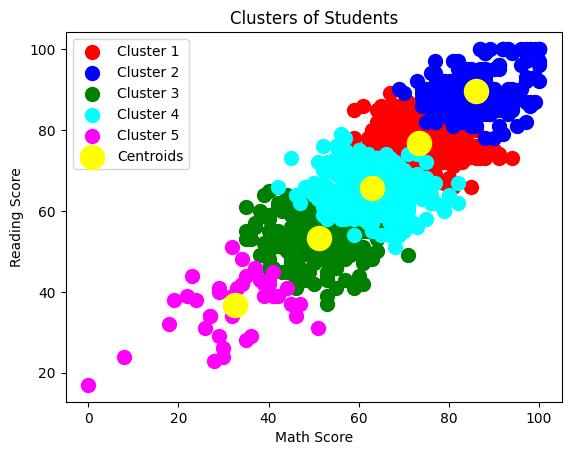

In [ ]:
#Visualize the clusters ( show 2D first: Math vs Reading)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Mark the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids')

plt.title('Clusters of Students')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()

####CLO 3 /18-Perform the cluster analysis such using Horizontal

[[72 72]
 [69 90]
 [90 95]
 [47 57]
 [76 78]]


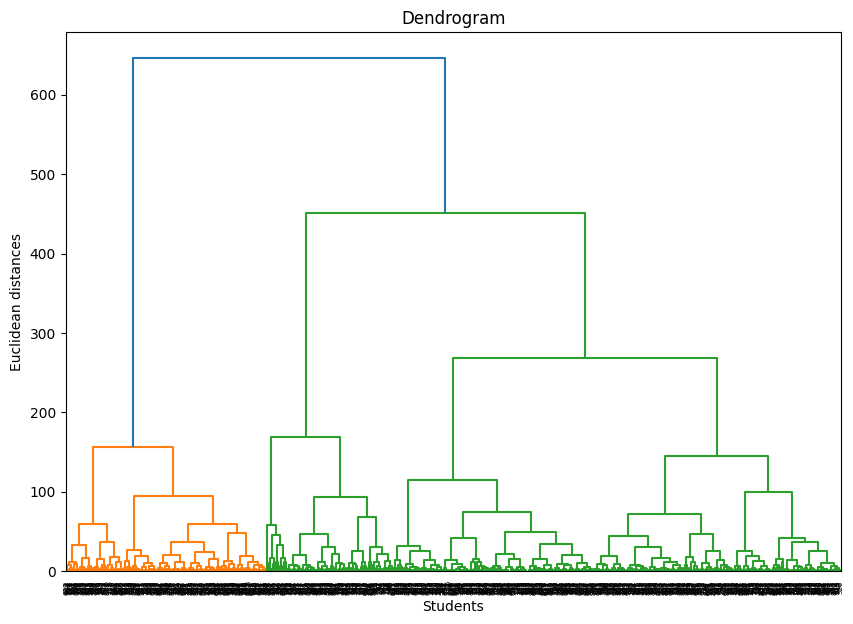

In [ ]:
#import first 5 rows
X = DS[['math score', 'reading score']].values
print(X[:5])

#Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean distances')
plt.show()

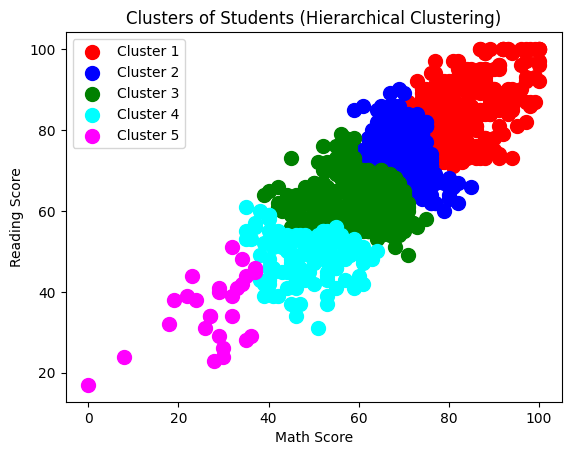

In [ ]:
#Training the Hierarchical Clustering model on the dataset
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

#Visualising the Clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of Students (Hierarchical Clustering)')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend()
plt.show()